In [1]:

# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
from scipy import stats
# magic word for producing visualizations in notebook
%matplotlib inline

# show all observation-related columns/rows
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)
from process_and_ml.where_is import WhereIs

In [2]:
where_is = WhereIs(False)

In [3]:
all_paths = where_is.get_paths_list

In [4]:
customers = pd.read_csv(all_paths[1], sep=';')
customers = customers.rename(columns={'CAMEO_INTL_2015':'CAMEO_DEUINTL_2015'})

/home/jair/.cache/pypoetry/virtualenvs/arvatocapstoneproject-L5ipTb8G-py3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3156: DtypeWarning: Columns (18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
### Drop Columns from costumers, that columns are specific
customers.drop(['PRODUCT_GROUP','CUSTOMER_GROUP','ONLINE_PURCHASE'], axis=1,inplace=True)

In [6]:
df_info_columns = pd.read_excel(all_paths[5], engine='openpyxl')

In [7]:
#Organizando os Atributes arruamndo o index e o nome das colunas
column_array = df_info_columns.iloc[0].values
column_array[0] = 'to_drop'
df_info_columns.columns = column_array

In [8]:
#Drop a coluna que veio errada da importação do Excell
df_info_columns.drop('to_drop', axis=1, inplace=True)


In [9]:
df_info_columns = df_info_columns.iloc[1:]

In [10]:
df_column_attributes = pd.read_excel(all_paths[6], engine='openpyxl')
column_array = df_column_attributes.iloc[0].values
column_array[0] = 'to_drop'
df_column_attributes.columns = column_array
df_column_attributes.drop('to_drop', axis=1, inplace=True)
df_column_attributes =df_column_attributes.iloc[1:]

In [11]:
columns_with_info = df_info_columns.Attribute.unique()
columns_with_attributes = df_column_attributes.Attribute.unique()

In [12]:
columns_with_info = np.delete(columns_with_info, 1)

In [13]:
columns_with_info = np.unique(np.concatenate((columns_with_info, columns_with_attributes)))

## Working on AzDias

In [14]:
azdias = pd.read_csv(all_paths[0], sep=';')
azdias = azdias.rename(columns={'CAMEO_INTL_2015':'CAMEO_DEUINTL_2015'})

In [15]:
azdias_cols = azdias.columns


In [16]:
columns_not_on_azdias = ['D19_BANKEN_LOKAL_RZ', 'D19_HAUS_DEKO_RZ', 'D19_TELKO_REST_RZ', 'D19_BEKLEIDUNG_REST_RZ', 'HAUSHALTSSTRUKTUR', 'D19_DROGERIEARTIKEL_RZ', 'D19_SAMMELARTIKEL_RZ', 'D19_KK_KUNDENTYP', 'D19_HANDWERK_RZ', 'KBA13_CCM_1400_2500', 'D19_TIERARTIKEL_RZ', 'D19_LOTTO_RZ', 'D19_TECHNIK_RZ', 'D19_LEBENSMITTEL_RZ', 'D19_SONSTIGE_RZ', 'D19_BIO_OEKO_RZ', 'D19_VERSAND_REST_RZ', 'D19_BILDUNG_RZ', 'D19_SCHUHE_RZ', 'D19_WEIN_FEINKOST_RZ', 'D19_DIGIT_SERV_RZ', 'D19_GARTEN_RZ', 'GEOSCORE_KLS7', 'D19_VOLLSORTIMENT_RZ', 'BIP_FLAG', 'D19_TELKO_MOBILE_RZ', 'D19_RATGEBER_RZ', 'CAMEO_DEUINTL_2015', 'D19_VERSICHERUNGEN_RZ', 'D19_FREIZEIT_RZ', 'D19_ENERGIE_RZ', 'D19_NAHRUNGSERGAENZUNG_RZ', 'D19_REISEN_RZ', 'D19_BEKLEIDUNG_GEH_RZ', 'D19_BANKEN_DIREKT_RZ', 'SOHO_FLAG', 'D19_BANKEN_REST_RZ', 'D19_KINDERARTIKEL_RZ', 'D19_KOSMETIK_RZ', 'WACHSTUMSGEBIET_NB', 'D19_BANKEN_GROSS_RZ', 'D19_BUCH_RZ']

In [17]:
columns_with_attributes = [col for col in columns_with_info if col  in azdias_cols]


In [18]:
azdias = azdias[columns_with_attributes]
customers = customers[columns_with_attributes]

In [19]:
#columns_to_drop = {'D19_LETZTER_KAUF_BRANCHE':'Other columns name, no descriptions', 'EINGEFUEGT_AM': 'No information about, data as input', 'LNR': 'Client Number'}

In [20]:
#Drop bad columns
#azdias.drop(columns_to_drop.keys(), axis=1, inplace=True)
#customers.drop(columns_to_drop.keys(), axis=1, inplace=True)

In [21]:
#Set NaNs
cod_nan = pd.read_csv(all_paths[2])

In [22]:
#Set Nans on invalid values
cod_nan.drop(cod_nan.columns[0], axis=1, inplace=True)

In [23]:
#Set attribute as NaN
cod_nan.set_index('Attribute', inplace=True)

In [24]:
cod_nan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 254 entries, AGER_TYP to ZABEOTYP
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Value   254 non-null    object
dtypes: object(1)
memory usage: 4.0+ KB


In [25]:
dict_to_nan = cod_nan.to_dict()['Value']

In [26]:
%%time
##Check for categorical values
for key, value in dict_to_nan.items():
    if len(value)> 2:
        dict_to_nan[key] = [int(num) for num in value.split(',')]
    else:
        dict_to_nan[key] = int(value)

CPU times: user 173 µs, sys: 31 µs, total: 204 µs
Wall time: 208 µs


In [27]:
dict_to_nan['CAMEO_DEUG_2015'] = [-1,'X']
dict_to_nan['CAMEO_DEU_2015'] = [-1,'XX']
dict_to_nan['CAMEO_DEUINTL_2015'] = [-1,'XX']


In [28]:
#Drop BIG FLAG column that doenst exist on any dataframe, but it is on column info dataframe
bip_flag = dict_to_nan.pop('BIP_FLAG')

In [29]:
azdias_cols = azdias.columns
customers_cols = customers.columns
columns_not_in = {'azdias':[], 'customers':[]}
for key, value, in dict_to_nan.items():
    if key in azdias_cols:
        azdias[key] = azdias[key].replace(value, np.nan)
        print(f'Porcentagem de nan pos replace {azdias[key].isnull().mean()}')
    else:
        columns_not_in['azdias'].append(key)
    if key in customers_cols:
        customers[key] = customers[key].replace(value, np.nan)
    else:
        columns_not_in['customers'].append(key)

Porcentagem de nan pos replace 0.7601964047076988
Porcentagem de nan pos replace 0.0
Porcentagem de nan pos replace 0.0
Porcentagem de nan pos replace 0.10518154307405234
Porcentagem de nan pos replace 0.11147852216229195
Porcentagem de nan pos replace 0.11147852216229195
Porcentagem de nan pos replace 0.005446460529992
Porcentagem de nan pos replace 0.9332522460758892
Porcentagem de nan pos replace 0.8910247850981967
Porcentagem de nan pos replace 0.7611254671961276
Porcentagem de nan pos replace 0.9779112027207617
Porcentagem de nan pos replace 0.815714620728192
Porcentagem de nan pos replace 0.656175067688037
Porcentagem de nan pos replace 0.5669783364619999
Porcentagem de nan pos replace 0.39739862503239937
Porcentagem de nan pos replace 0.626733436487695
Porcentagem de nan pos replace 0.5060417113151507
Porcentagem de nan pos replace 0.9627129522307037
Porcentagem de nan pos replace 0.9270517638161578
Porcentagem de nan pos replace 0.9190918975203681
Porcentagem de nan pos replace

In [30]:
#number of missing values by each column in azdias dataset
col_nul_percent=azdias.isnull().sum()/azdias.shape[0]


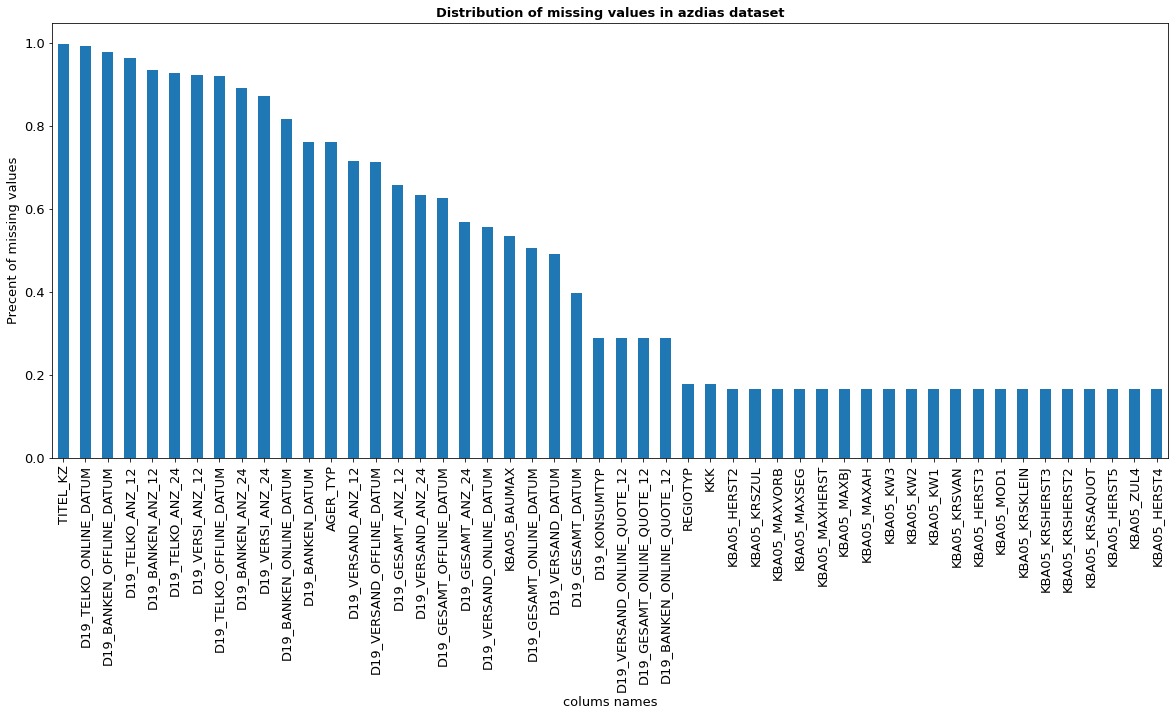

In [31]:
plt.title("Distribution of missing values in azdias dataset",fontsize=13,fontweight="bold")
plt.xlabel("colums names",fontsize=13)
plt.ylabel("Precent of missing values",fontsize=13)
(col_nul_percent.sort_values(ascending=False)[:50].plot(kind='bar', figsize=(20,8), fontsize=13));


Text(0, 0.5, 'count')

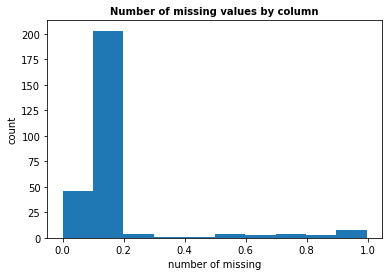

In [32]:

plt.hist(col_nul_percent)
plt.title("Number of missing values by column",fontsize=10,fontweight="bold")
plt.xlabel("number of missing",fontsize=10)
plt.ylabel("count",fontsize=10)

In [33]:
#Distribution of missing values by rows:-
row_nul_percent=azdias.isnull().sum(axis=1)

Text(0, 0.5, 'count')

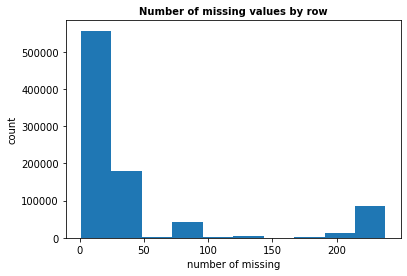

In [34]:
plt.hist(row_nul_percent)
plt.title("Number of missing values by row",fontsize=10,fontweight="bold")
plt.xlabel("number of missing",fontsize=10)
plt.ylabel("count",fontsize=10)


In [35]:
#droping columns that have more than 20% of missing values
column_nans = azdias.isnull().mean()
drop_cols = azdias.columns[column_nans > 0.30]
print('columns to drop: ', drop_cols)

columns to drop:  Index(['AGER_TYP', 'D19_BANKEN_ANZ_12', 'D19_BANKEN_ANZ_24',
       'D19_BANKEN_DATUM', 'D19_BANKEN_OFFLINE_DATUM',
       'D19_BANKEN_ONLINE_DATUM', 'D19_GESAMT_ANZ_12', 'D19_GESAMT_ANZ_24',
       'D19_GESAMT_DATUM', 'D19_GESAMT_OFFLINE_DATUM',
       'D19_GESAMT_ONLINE_DATUM', 'D19_TELKO_ANZ_12', 'D19_TELKO_ANZ_24',
       'D19_TELKO_OFFLINE_DATUM', 'D19_TELKO_ONLINE_DATUM',
       'D19_VERSAND_ANZ_12', 'D19_VERSAND_ANZ_24', 'D19_VERSAND_DATUM',
       'D19_VERSAND_OFFLINE_DATUM', 'D19_VERSAND_ONLINE_DATUM',
       'D19_VERSI_ANZ_12', 'D19_VERSI_ANZ_24', 'KBA05_BAUMAX', 'TITEL_KZ'],
      dtype='object')


In [36]:
azdias.drop(drop_cols, axis=1, inplace=True)

In [37]:
customers.drop(drop_cols, axis=1, inplace=True)

In [38]:
##Working on wohnlage remove 0 as no socre calculate, change by nan
azdias['WOHNLAGE'].replace(0,np.nan)

0         NaN
1         4.0
2         2.0
3         7.0
4         3.0
         ... 
891216    3.0
891217    5.0
891218    7.0
891219    5.0
891220    4.0
Name: WOHNLAGE, Length: 891221, dtype: float64

In [39]:
##Working on CAMEO_INTL_2015
values_list_azdias = list(azdias['CAMEO_DEUINTL_2015'].values)
values_list_customers = list(customers['CAMEO_DEUINTL_2015'].values)

In [40]:
azdias['WEALTH'] = [value if pd.isnull(value) else int(str(value)[0]) for value in values_list_azdias]

In [41]:
azdias['LIFE_AGE'] = [value if pd.isnull(value) else int(str(value)[1]) for value in values_list_azdias]

In [42]:
customers['WEALTH'] = [value if pd.isnull(value) else int(str(value)[0]) for value in values_list_customers]

In [43]:
customers['LIFE_AGE'] = [value if pd.isnull(value) else int(str(value)[1]) for value in values_list_customers]

In [44]:
azdias.drop('CAMEO_DEUINTL_2015', axis=1, inplace=True)

In [45]:
customers.drop('CAMEO_DEUINTL_2015', axis=1, inplace=True)

In [46]:
azdias['PLZ8_BAUMAX_FAMILY'] = np.where(azdias['PLZ8_BAUMAX']==5, 0, azdias['PLZ8_BAUMAX'])
azdias['PLZ8_BAUMAX_bussiness'] = np.where(azdias['PLZ8_BAUMAX']==5, 1, np.where(azdias['PLZ8_BAUMAX'].isnull(),azdias['PLZ8_BAUMAX'], 0))

In [47]:
customers['PLZ8_BAUMAX_FAMILY'] = np.where(customers['PLZ8_BAUMAX']==5, 0, customers['PLZ8_BAUMAX'])
customers['PLZ8_BAUMAX_bussiness'] = np.where(customers['PLZ8_BAUMAX']==5, 1, np.where(customers['PLZ8_BAUMAX'].isnull(),customers['PLZ8_BAUMAX'], 0))

In [48]:
azdias['PLZ8_BAUMAX_bussiness'].value_counts()


0.0    677373
1.0     97333
Name: PLZ8_BAUMAX_bussiness, dtype: int64

In [49]:
azdias.drop('PLZ8_BAUMAX', axis=1, inplace=True)
customers.drop('PLZ8_BAUMAX', axis=1, inplace=True)

In [50]:
#Split categorical variables into binary or multi buckets
categorical_binary = []
categorical_multi = []
for feature in azdias.columns:
    if azdias[feature].nunique() > 2:
        categorical_multi.append(feature)
    else:
        categorical_binary.append(feature)


In [51]:
for col in categorical_binary:
    print(azdias[col].value_counts())


2    465305
1    425916
Name: ANREDE_KZ, dtype: int64
0    715996
1    175225
Name: GREEN_AVANTGARDE, dtype: int64
0.0    654630
1.0     88481
Name: KBA05_SEG6, dtype: int64
W    629528
O    168545
Name: OST_WEST_KZ, dtype: int64
2.0    398722
1.0    381303
Name: VERS_TYP, dtype: int64
0.0    677373
1.0     97333
Name: PLZ8_BAUMAX_bussiness, dtype: int64


In [52]:

# Re-encode categorical variable(s) to be kept in the analysis.
for col in categorical_multi:
    print(azdias[col].value_counts())

3    358533
4    228510
2    158410
1    142887
9      2881
Name: ALTERSKATEGORIE_GROB, dtype: int64
0.0     236768
18.0     60852
17.0     55665
19.0     52890
15.0     51867
16.0     51857
14.0     44275
21.0     41610
20.0     40671
13.0     37612
12.0     34923
10.0     30419
11.0     27924
9.0      22817
8.0      13463
7.0       8419
6.0       3809
5.0       1030
4.0        603
3.0        200
2.0         47
1.0          1
Name: ALTER_HH, dtype: int64
1.0      195957
2.0      120982
3.0       62575
4.0       43213
5.0       37815
6.0       36020
7.0       34526
8.0       32293
9.0       29002
10.0      25428
11.0      21965
12.0      18033
13.0      15282
14.0      12625
15.0      10371
16.0       8899
17.0       7292
0.0        6463
18.0       6324
19.0       5461
20.0       4674
21.0       4138
22.0       3735
23.0       3243
24.0       2838
25.0       2636
26.0       2342
27.0       2232
28.0       2040
29.0       1963
30.0       1821
31.0       1634
32.0       1616
33.0       1

In [53]:
#Check numeric columns
#num_cols = azdias._get_numeric_data().columns

In [54]:
# Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables.

# Generation
generations = {0: [1, 2], # 40s
               1: [3, 4], # 50s
               2: [5, 6, 7], # 60s
               3: [8, 9], # 70s
               4: [10, 11, 12, 13], # 80s
               5:[14, 15]} # 90s

def classify_generation(value):
    try:
        for key, values in generations.items():
            if value in values:
                return key
    # In case value is NaN
    except ValueError:
        return np.nan

# Movement
mainstream = [1, 3, 5, 8, 10, 12, 14]

def classify_movement(value):
    try:
        if value in mainstream:
            return 1
        else:
            return 0
    # In case value is NaN
    except ValueError:
        return np.nan



In [55]:
# Engineer generation column
azdias['PRAEGENDE_JUGENDJAHRE_GEN'] = azdias['PRAEGENDE_JUGENDJAHRE'].apply(classify_generation)
#azdias.loc[:,'PRAEGENDE_JUGENDJAHRE_GEN'] = azdias['PRAEGENDE_JUGENDJAHRE'].apply(classify_generation)

# Engineer movement column
azdias['PRAEGENDE_JUGENDJAHRE_MOV'] = azdias['PRAEGENDE_JUGENDJAHRE'].apply(classify_movement)
#azdias_new.loc[:,'PRAEGENDE_JUGENDJAHRE_MOV'] = azdias_new['PRAEGENDE_JUGENDJAHRE'].apply(classify_movement)

In [56]:
# Engineer generation column
customers['PRAEGENDE_JUGENDJAHRE_GEN'] = customers['PRAEGENDE_JUGENDJAHRE'].apply(classify_generation)
#azdias.loc[:,'PRAEGENDE_JUGENDJAHRE_GEN'] = azdias['PRAEGENDE_JUGENDJAHRE'].apply(classify_generation)

# Engineer movement column
customers['PRAEGENDE_JUGENDJAHRE_MOV'] = customers['PRAEGENDE_JUGENDJAHRE'].apply(classify_movement)
#azdias_new.loc[:,'PRAEGENDE_JUGENDJAHRE_MOV'] = azdias_new['PRAEGENDE_JUGENDJAHRE'].apply(classify_movement)

In [57]:
columns_to_drop_afterclean = ['PRAEGENDE_JUGENDJAHRE', 'KKK', 'REGIOTYP']
azdias.drop(columns_to_drop_afterclean, axis=1, inplace=True)
customers.drop(columns_to_drop_afterclean, axis=1, inplace=True)



In [58]:
col_types = azdias.select_dtypes(include='object')


In [59]:
col_types.value_counts()


CAMEO_DEUG_2015  CAMEO_DEU_2015  OST_WEST_KZ
6                6B              W              27368
8                8A              W              24570
4                4C              W              24146
6.0              6B              W              19982
4                4A              W              18535
2                2D              W              17843
8.0              8A              W              17611
4.0              4C              W              17601
3                3C              W              17344
8                8B              W              14656
7                7A              W              14595
9                9D              W              13836
3                3D              W              13637
4.0              4A              W              13465
2.0              2D              W              12760
3.0              3C              W              12582
7                7B              W              11583
8                8C              W   

In [60]:
object_cols = [obj for obj in col_types if obj == 'object']

In [61]:
## Find Columns with high correlation


# Identify correlations between numeric features
def correlated_columns_to_drop(df, min_corr_level=0.95):

    # Create correlation matrix
    corr_matrix = df.corr().abs()

    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

    # Find index of feature columns with correlation greater than min_corr_level
    to_drop = [column for column in upper.columns if any(upper[column] > min_corr_level)]

    return to_drop




In [62]:
# Examine numerical features
df_num = azdias.select_dtypes(include = ['float64', 'int64'])
df_num.shape


(891221, 251)

In [63]:
columns_to_drop = correlated_columns_to_drop(df_num, 0.95)

/home/jair/.cache/pypoetry/virtualenvs/arvatocapstoneproject-L5ipTb8G-py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # This is added back by InteractiveShellApp.init_path()


In [64]:
azdias.drop(columns_to_drop, axis=1, inplace=True)
customers.drop(columns_to_drop, axis=1, inplace=True)

In [65]:
list_cols_rest_to_drop = ['REGIOTYP', 'KKK', 'KBA05_BAUMAX', 'TITEL_KZ', 'AGER_TYP', 'GEBURTSJAHR', 'ALTER_HH', 'GEBAEUDETYP_5.0']
azdias_cols = azdias.columns
customers_cols = customers.columns
for each in list_cols_rest_to_drop:
        if each in customers_cols:
            customers = customers.drop([each], axis=1)
        if each in azdias_cols:
            azdias = azdias.drop([each], axis=1)


In [66]:

#Split categorical variables into binary or multi buckets
categorical_binary = []
categorical_multi = []
for feature in azdias.columns:
    if azdias[feature].nunique() > 2:
        categorical_multi.append(feature)
    else:
        categorical_binary.append(feature)

In [67]:
set(azdias.columns).difference(customers.columns)
#testing get_dummy with 10 columns
#azdias_copy = pd.get_dummies(azdias_copy, columns=categorical_multi[0:10])

set()

In [68]:
## Transform Dummy Categorical Values
### Drop this columns from categorical_multi - ['PRAEGENDE_JUGENDJAHRE', 'KKK', 'REGIOTYP'] before dummy
## verificar solucao para rodar get_dummies mais rapido
# Do one-hot-encoding and remove reference columns
#azdias = pd.get_dummies(azdias, columns=categorical_multi)



In [71]:
##Save dataframes
#azdias.to_csv('data/cleaned_data/azdias_clean.csv')
#customers.to_csv('data/cleaned_data/customers_clear.csv')

In [19]:
import pandas as pd
from models.constants import RANDOM_STATE
azdias_clean_sample = pd.read_csv('data/cleaned_data/azdias_clean.csv').sample(frac=0.4, random_state=RANDOM_STATE)
customers_clean_sample = pd.read_csv('data/cleaned_data/customers_clear.csv').sample(frac=0.4, random_state=RANDOM_STATE)

In [20]:
customers_clean_sample = customers_clean_sample[customers_clean_sample.columns[1:]]

In [21]:
azdias_clean_sample = azdias_clean_sample[azdias_clean_sample.columns[1:]]

In [16]:
#df_train = pd.read_csv(all_paths[4], sep=';')

# TODO: TRANSFORMAR TUDO ISTO EM UMA FUNÇÃO DE LIMPEZA
from models.pipeline import preprocessing_baseline, show_metrics_baseline
from catboost import CatBoostClassifier, Pool

In [22]:
df_to_model = pd.concat(
    [customers_clean_sample.assign(is_customer=1),
     azdias_clean_sample.assign(is_customer=0)]
)

cat_features = df_to_model.select_dtypes(include=['category', 'object']).columns

features, labels = preprocessing_baseline(df_to_model,
                                          cat_features=cat_features,
                                          target='is_customer')

X_train, X_test, X_valid = features
y_train, y_test, y_valid = labels

class_weights = (1, sum(y_train == 0) / sum(y_train == 1))

catboost = CatBoostClassifier(num_trees=40,
                              max_depth=3,
                              min_child_samples=30,
                              one_hot_max_size=5,
                              class_weights=class_weights,
                              cat_features=cat_features,
                              random_state=RANDOM_STATE,
                              eval_metric='AUC')

catboost.fit(X_train, y_train, eval_set=(X_valid, y_valid), verbose=False)


In [23]:
show_metrics_baseline(catboost, features=features, labels=labels)


Accuracy Train: 0.8037196079207398
AUC Train: 0.898883302653498
Accuracy Test: 0.8010989349258142
AUC Test: 0.895790361650225
Accuracy Valid: 0.8029796992596925
AUC Valid: 0.8976013273144964


In [ ]:

##Working on OST
#azdias['OST_WEST_KZ'].replace(['O','W'], [0, 1], inplace=True)
#customers['OST_WEST_KZ'].replace(['O','W'], [0, 1], inplace=True)
